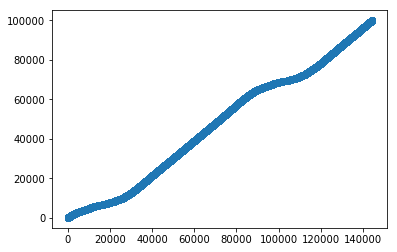

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

# load data
names = None
rows = []
last_row = None
with open('../../datasets/creditcard.csv') as csvfile:
    csvdata = csv.reader(csvfile)
    first_line = True;
    for row in csvdata:
        if (first_line):
            names = row
            first_line = False
        elif last_row is None or last_row[0] != row[0]:
            rows.append(row)
            last_row = row
            
# preprocess data
timestamps_strings_with_duplicates = [int(float(ts)) for ts in [row[0] for row in rows][0:100000]]
timestamps_with_duplicates = [int(ts) for ts in timestamps_strings_with_duplicates]
timestamps = np.array(sorted(list(set(timestamps_with_duplicates))))

positions = np.array([i for i in range(len(timestamps))])

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

max_timestamp = np.max(timestamps)

xs = timestamps.reshape(-1, 1)
ys = positions

timestamps_count = len(timestamps)

def sparse(arr, times):
    return [arr[i] for i in range(len(arr)) if i % times == 0]

plt.plot(timestamps, positions, 'o')

[ -4513.88231026  -4513.16696098  -4512.4516117  ...,  98691.70492201
  98692.4202713   98693.13562058]


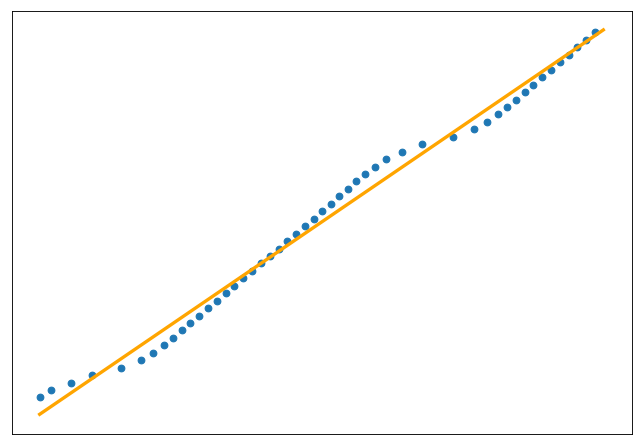

In [15]:
lin_regr = linear_model.LinearRegression()

lin_regr.fit(xs, ys)

ys_pred = lin_regr.predict(xs)

print(ys_pred)

sparse_coef = timestamps_count // 50

fig=plt.figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(sparse(timestamps, sparse_coef), sparse(positions, sparse_coef), 'o')
plt.plot(xs, ys_pred, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


items: 100000
[     0.      0.      0. ...,  99999.  99999.  99999.]
wasted slots: 14.79%


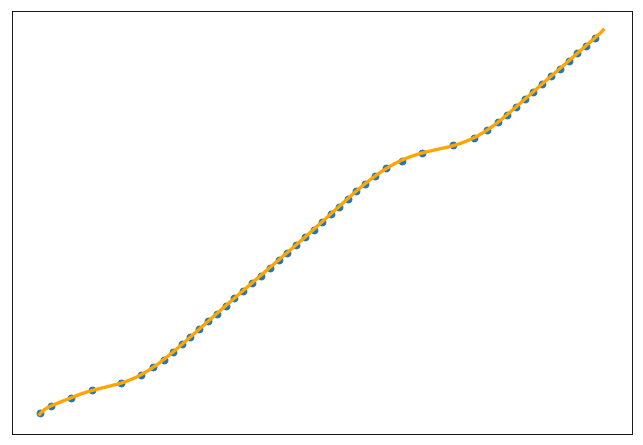

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_regr = linear_model.LinearRegression()

xs_normalized = xs / max_timestamp

# TODO(vmykh): print table with collisions depending on degree
poly = PolynomialFeatures(degree=15)
xs_poly = poly.fit_transform(xs_normalized)

poly_regr.fit(xs_poly, ys)

ys_pred = poly_regr.predict(xs_poly)

print("items: " + str(len(positions)))
limit_position = lambda x, x_min, x_max: x_min if x < x_min else (x_max if x > x_max else x) 

predicted_positions = [limit_position(pos, 0, timestamps_count - 1) for pos in list(np.round(ys_pred))];
print(np.array(predicted_positions))

slots_usage_ratio = len(set(predicted_positions)) / len(predicted_positions);
print("wasted slots: %.2f%%" % (100 - 100 * slots_usage_ratio))


sparse_coef = timestamps_count // 50

fig=plt.figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')

plt.plot(sparse(timestamps, sparse_coef), sparse(positions, sparse_coef), 'o')
plt.plot(xs, ys_pred, color='orange', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

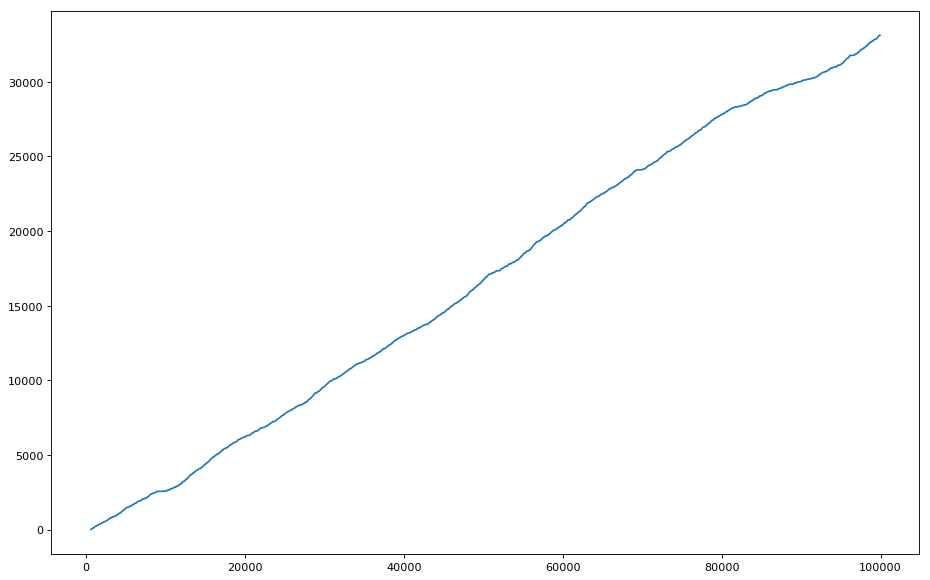

In [12]:
names = None
rows = []
with open('../../datasets/us_zipcode_to_population.csv') as csvfile:
    csvdata = csv.reader(csvfile)
    first_line = True;
    for row in csvdata:
        if (first_line):
            names = row
            first_line = False
        else:
            rows.append(row)
        
len(rows)

zipcodes = np.array([row[0] for row in rows])
positions = np.array([i for i in range(len(zipcodes))])

fig=plt.figure(figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')

plt.plot(zipcodes, positions)

In [16]:
from IPython.display import HTML, display

data = [[1,2,3],
         [4,5,6],
         [7,8,9],
         ]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
        )
 ))

1,2,3
4,5,6
7,8,9


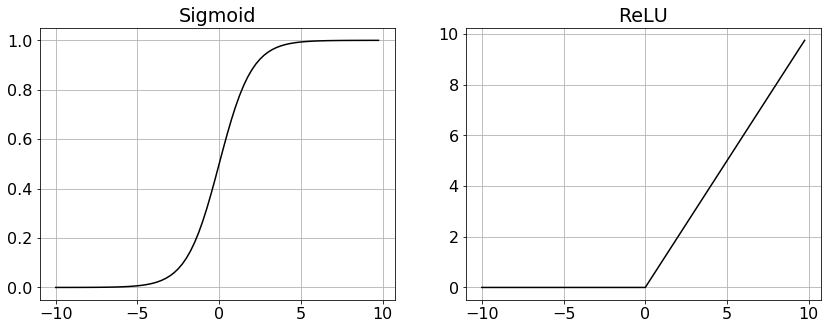

In [30]:
from math import e

s = lambda x: 1 / (1 + e ** (-x))
xs = np.arange(-10, 10, 0.25)

# fig=plt.figure(figsize=(14, 9), dpi=80, facecolor='w', edgecolor='k')

# plt.grid()
# plt.plot(xs, [s(x) for x in xs])

import matplotlib
matplotlib.rcParams.update({'font.size': 16})

f, (plt_left, plt_right) = plt.subplots(1, 2, figsize=(14, 5))

plt_left.set_title('Sigmoid')
plt_left.grid()
plt_left.plot(xs, [s(x) for x in xs], "black")

plt_right.set_title('ReLU')
plt_right.grid()
plt_right.plot(xs, [max(x, 0) for x in xs], "black")